# **PRE PROCESSING**

In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [153]:
# load the dataset
import pandas as pd

# load the dataset with specified encoding
df = pd.read_excel("/content/dataset updated1.xlsx")



In [154]:
#checking null values

df.isna().sum()

Text     0
Label    0
dtype: int64

In [155]:
#drop null values

df.dropna(axis=0,inplace=True)

In [156]:
#count the unique values
df['Label'].value_counts()

Label
student    1158
ai          633
Name: count, dtype: int64

In [157]:
#fast five view
df.head(10)

,Text,Label
0,y r u always l8 to the meetings?,student
1,The project team embraced a user-centric desig...,ai
2,"i dont like dealing with risks, it's too stres...",student
3,"i dont worry about reliability, it's good enough",student
4,"i dont care about human-centered design, just ...",student
5,The study's methodology ensured a representati...,ai
6,"i dont care about industry practices, just giv...",student
7,The project team documented all processes for ...,ai
8,The project team maintained open lines of comm...,ai
9,The findings are consistent with existing theo...,ai


# **Import required libraries**

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold



In [112]:
df['Label'].value_counts()

Label
student    1158
ai          633
Name: count, dtype: int64

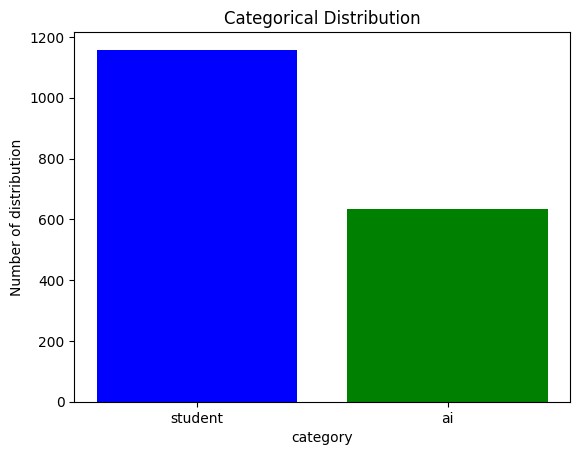

In [113]:
#plot the categorical distribution

index = df['Label'].value_counts().index
values = df['Label'].value_counts().values

plt.bar(index,values,color=['b','g'])
plt.title("Categorical Distribution")
plt.xlabel("category")
plt.ylabel("Number of distribution")
plt.show()

# # **Text preprocessing**

In [114]:
lbl = LabelEncoder()
df['Label'] = lbl.fit_transform(df['Label'])

**ai replaced with 0 and student replaced with 1**

In [115]:
df.head()  # ai=0,student=1

,Text,Label
0,y r u always l8 to the meetings?,1
1,The project team embraced a user-centric desig...,0
2,"i dont like dealing with risks, it's too stres...",1
3,"i dont worry about reliability, it's good enough",1
4,"i dont care about human-centered design, just ...",1


# **Applying term frequency inverse document frequency**

In [116]:
tf = TfidfVectorizer(stop_words='english',lowercase=True)
x = tf.fit_transform(df['Text']).toarray()

# **separate the text and label**

In [117]:
x = np.array(x)
y = np.array(df['Label'])

# **split train and test values**

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# **Use multinomial naive bayes**

In [119]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

# **prediction**

In [120]:
y_pred = nb.predict(x_test)

In [121]:
from sklearn.model_selection import cross_val_score
# K-fold cross-validation
k = 6  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(nb, x, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.96655518 0.96989967 0.97993311 0.95637584 0.94966443 0.96308725]
Mean accuracy: 0.9642525794407906


# **performance**

In [122]:
print(f"accuracy of the model:{accuracy_score(y_test,y_pred)*100:.2f}%")

accuracy of the model:96.10%


In [123]:
#confusion matrix

cnf = confusion_matrix(y_test,y_pred)
cnf

array([[119,  11],
       [  3, 226]])

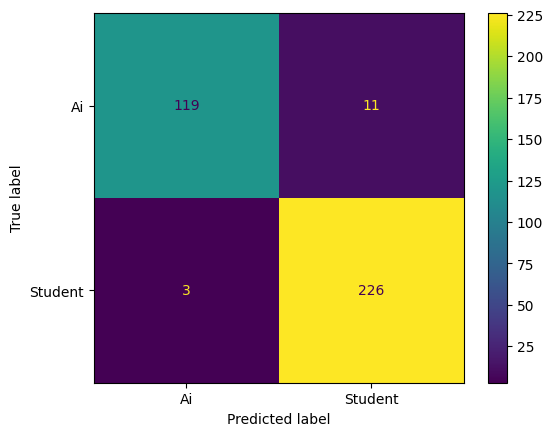

In [124]:
ax = ConfusionMatrixDisplay(cnf,display_labels=['Ai','Student']).plot()
plt.show()

In [125]:


# Create a new column in the dataframe to store the predicted labels
df['predicted_label'] = nb.predict(x)

# Print the first few rows of the dataframe to show how the predicted labels look
print(df.head(20))


                                                 Text  Label  predicted_label
0                    y r u always l8 to the meetings?      1                1
1   The project team embraced a user-centric desig...      0                0
2   i dont like dealing with risks, it's too stres...      1                1
3    i dont worry about reliability, it's good enough      1                1
4   i dont care about human-centered design, just ...      1                1
5   The study's methodology ensured a representati...      0                0
6   i dont care about industry practices, just giv...      1                1
7   The project team documented all processes for ...      0                0
8   The project team maintained open lines of comm...      0                0
9   The findings are consistent with existing theo...      0                0
10  i dont like inclusive decision-making, it's to...      1                1
11  The results are presented in a logically organ...      0    

In [126]:


df['Label'] = df['Label'].replace({0: 'Ai', 1: 'Student'})
df['predicted_label'] = df['predicted_label'].replace({0: 'Ai', 1: 'Student'})

print(df.head(20))

                                                 Text    Label predicted_label
0                    y r u always l8 to the meetings?  Student         Student
1   The project team embraced a user-centric desig...       Ai              Ai
2   i dont like dealing with risks, it's too stres...  Student         Student
3    i dont worry about reliability, it's good enough  Student         Student
4   i dont care about human-centered design, just ...  Student         Student
5   The study's methodology ensured a representati...       Ai              Ai
6   i dont care about industry practices, just giv...  Student         Student
7   The project team documented all processes for ...       Ai              Ai
8   The project team maintained open lines of comm...       Ai              Ai
9   The findings are consistent with existing theo...       Ai              Ai
10  i dont like inclusive decision-making, it's to...  Student         Student
11  The results are presented in a logically organ..

In [127]:


new_text = input("Enter a new text: ")
new_text_vectorized = tf.transform([new_text]).toarray()
prediction = nb.predict(new_text_vectorized)
if prediction == 0:
  print("The text is predicted as Ai.")
else:
  print("The text is predicted as Student.")


Enter a new text: ok
The text is predicted as Student.


# **Deep learning framework**

In [128]:
#import necessary libraries

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,Embedding,Dense,Flatten
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential

In [129]:
#passing object to the tokenizer

tk = Tokenizer()
tk.fit_on_texts(df['Text'])
seq = tk.texts_to_sequences(df['Text'])
vec = pad_sequences(seq,padding='post',maxlen=50)

In [130]:
#split the feature and label

x_arr = np.array(vec)
y_arr = np.array(df['Label'])

In [131]:
#split into training and testing

X_train,X_test,Y_train,Y_test = train_test_split(x_arr,y_arr,test_size=0.2,random_state=0)

In [132]:
# SNN Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(input_dim=len(tk.word_index)+1, output_dim=100, input_length=50)
snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

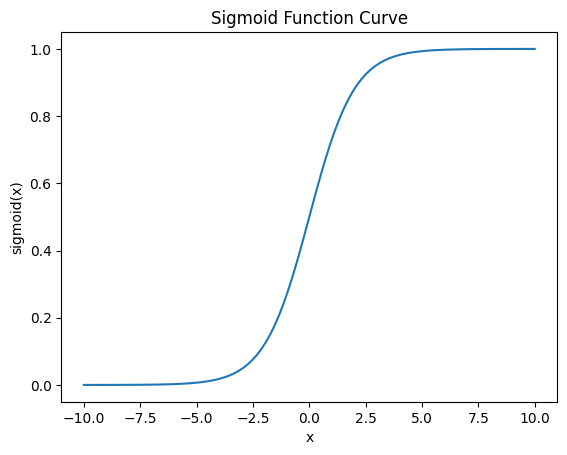

In [133]:
# prompt: generate sigmoid funtion curev for above

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function Curve')
plt.show()


In [134]:
# prompt: explain the sigmoid fucntion calsulations for this dataset talking a single text as example

# The sigmoid function is a mathematical function that is commonly used in neural networks to model the output of a neuron. It is a smooth, S-shaped curve that maps input values to output values between 0 and 1.

# The sigmoid function is defined as follows:



In [135]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           212100    
                                                                 
 flatten_2 (Flatten)         (None, 5000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 217101 (848.05 KB)
Trainable params: 217101 (848.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [136]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 1s 8ms/step - loss: 0.5903 - acc: 0.6603 - val_loss: 0.4985 - val_acc: 0.7840
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3712 - acc: 0.9004 - val_loss: 0.2667 - val_acc: 0.9373
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1706 - acc: 0.9834 - val_loss: 0.1564 - val_acc: 0.9477
Epoch 4/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0849 - acc: 0.9956 - val_loss: 0.1161 - val_acc: 0.9582
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0487 - acc: 0.9983 - val_loss: 0.0996 - val_acc: 0.9582
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0310 - acc: 0.9983 - val_loss: 0.0875 - val_acc: 0.9582
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0213 - acc: 0.9983 - val_loss: 0.0794 - val_acc: 0.9582
Epoch 8/10
36/36 [==============================] - 0s 5ms/step - loss: 0.0152 - acc: 0.99

In [137]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

12/12 [==============================] - 0s 2ms/step - loss: 0.0635 - acc: 0.9805


In [138]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.063459612429142
Test Accuracy: 0.9805014133453369


In [139]:
snn_model_history.history

{'loss': [0.5903206467628479,
  0.3712038993835449,
  0.1705603003501892,
  0.08491077274084091,
  0.04868635907769203,
  0.030960455536842346,
  0.021332360804080963,
  0.015229699201881886,
  0.011372658424079418,
  0.008862106129527092],
 'acc': [0.6602619886398315,
  0.9004366993904114,
  0.983406126499176,
  0.9956331849098206,
  0.9982532858848572,
  0.9982532858848572,
  0.9982532858848572,
  0.9982532858848572,
  1.0,
  1.0],
 'val_loss': [0.4984807074069977,
  0.2667265832424164,
  0.15644565224647522,
  0.11613862961530685,
  0.09958608448505402,
  0.08751992136240005,
  0.07939662039279938,
  0.07658796012401581,
  0.07300708442926407,
  0.06950677931308746],
 'val_acc': [0.7839721441268921,
  0.9372822046279907,
  0.9477351903915405,
  0.9581881761550903,
  0.9581881761550903,
  0.9581881761550903,
  0.9581881761550903,
  0.9616724848747253,
  0.9616724848747253,
  0.9616724848747253]}

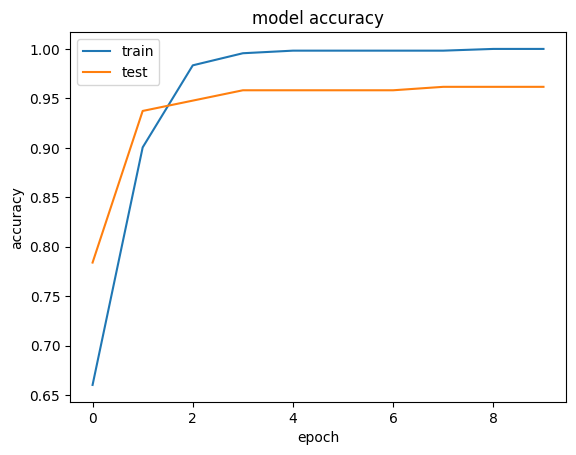

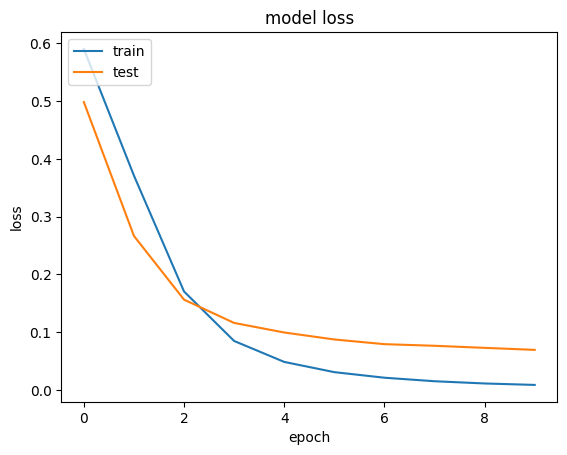

In [140]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [141]:
!pip install tensorflow
import tensorflow as tf

In [142]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(input_dim=len(tk.word_index)+1, output_dim=100, input_length=50)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(units=100, return_sequences=True))
lstm_model.add(Flatten())

lstm_model.add(Dense(1, activation='sigmoid'))

In [143]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           212100    
                                                                 
 lstm_1 (LSTM)               (None, 50, 100)           80400     
                                                                 
 flatten_3 (Flatten)         (None, 5000)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 297501 (1.13 MB)
Trainable params: 297501 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [144]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 5s 227ms/step - loss: 0.6593 - acc: 0.6183 - val_loss: 0.6343 - val_acc: 0.6446
Epoch 2/10
9/9 [==============================] - 1s 120ms/step - loss: 0.6161 - acc: 0.6498 - val_loss: 0.5671 - val_acc: 0.6446
Epoch 3/10
9/9 [==============================] - 1s 160ms/step - loss: 0.4129 - acc: 0.7572 - val_loss: 0.1377 - val_acc: 0.9721
Epoch 4/10
9/9 [==============================] - 2s 233ms/step - loss: 0.0695 - acc: 0.9843 - val_loss: 0.1198 - val_acc: 0.9826
Epoch 5/10
9/9 [==============================] - 3s 296ms/step - loss: 0.0173 - acc: 0.9974 - val_loss: 0.1672 - val_acc: 0.9652
Epoch 6/10
9/9 [==============================] - 2s 273ms/step - loss: 0.0102 - acc: 0.9991 - val_loss: 0.1059 - val_acc: 0.9721
Epoch 7/10
9/9 [==============================] - 2s 250ms/step - loss: 0.0047 - acc: 0.9991 - val_loss: 0.0636 - val_acc: 0.9791
Epoch 8/10
9/9 [==============================] - 2s 239ms/step - loss: 6.8617e-04 - acc: 

In [145]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

12/12 [==============================] - 0s 33ms/step - loss: 0.0608 - acc: 0.9861


In [146]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0608278252184391
Test Accuracy: 0.9860724210739136


In [147]:
lstm_model_history.history

{'loss': [0.6592682600021362,
  0.6160556077957153,
  0.4128996729850769,
  0.06946942955255508,
  0.017273686826229095,
  0.010209726169705391,
  0.004702117294073105,
  0.0006861704168841243,
  0.00019297364633530378,
  0.00012181441707070917],
 'acc': [0.6183406114578247,
  0.6497816443443298,
  0.7572052478790283,
  0.984279453754425,
  0.9973798990249634,
  0.9991266131401062,
  0.9991266131401062,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6343016624450684,
  0.5670967102050781,
  0.1377229541540146,
  0.1198451891541481,
  0.1672089844942093,
  0.10589645802974701,
  0.0636017695069313,
  0.07484229654073715,
  0.08656801283359528,
  0.09159703552722931],
 'val_acc': [0.6445993185043335,
  0.6445993185043335,
  0.9721254110336304,
  0.9825783967971802,
  0.9651567935943604,
  0.9721254110336304,
  0.9790940880775452,
  0.9825783967971802,
  0.9790940880775452,
  0.9756097793579102]}

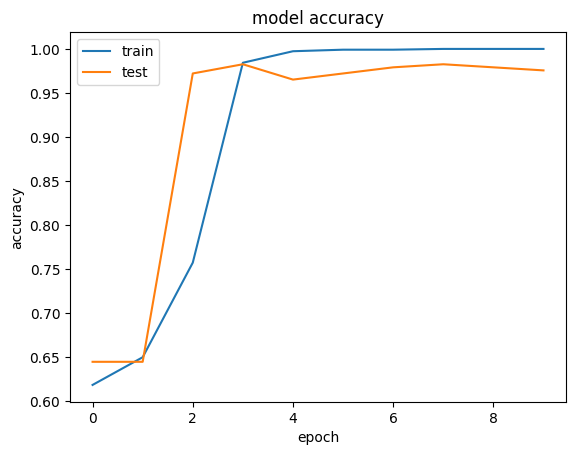

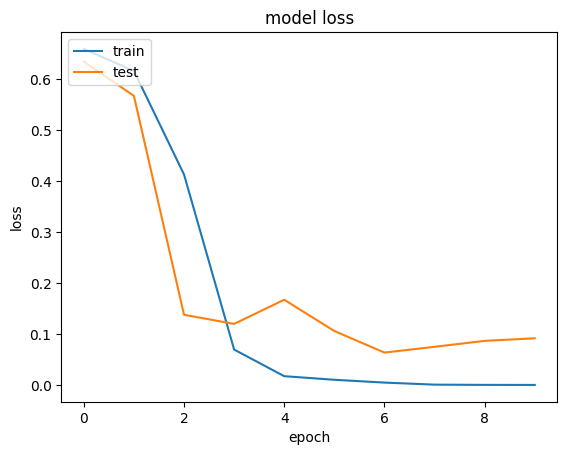

In [148]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

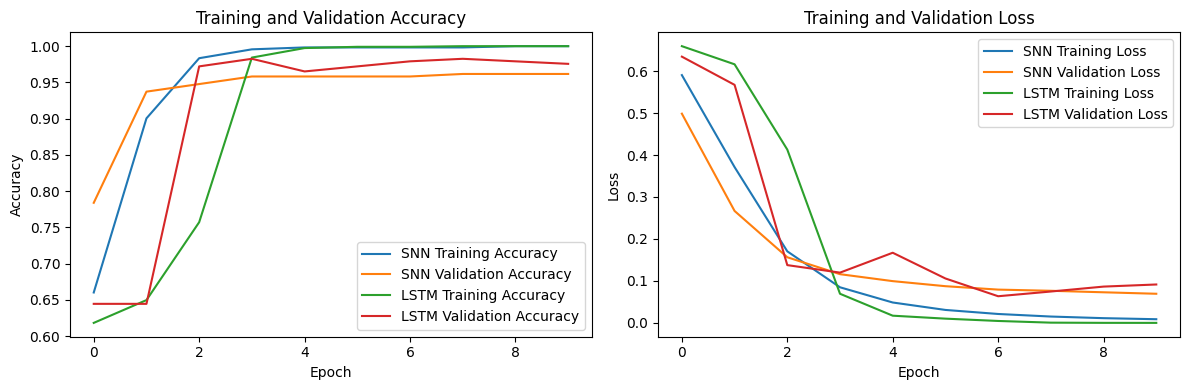

In [149]:


# Plot the training and validation accuracy and loss for both models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(snn_model_history.history['acc'], label='SNN Training Accuracy')
plt.plot(snn_model_history.history['val_acc'], label='SNN Validation Accuracy')
plt.plot(lstm_model_history.history['acc'], label='LSTM Training Accuracy')
plt.plot(lstm_model_history.history['val_acc'], label='LSTM Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(snn_model_history.history['loss'], label='SNN Training Loss')
plt.plot(snn_model_history.history['val_loss'], label='SNN Validation Loss')
plt.plot(lstm_model_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_model_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


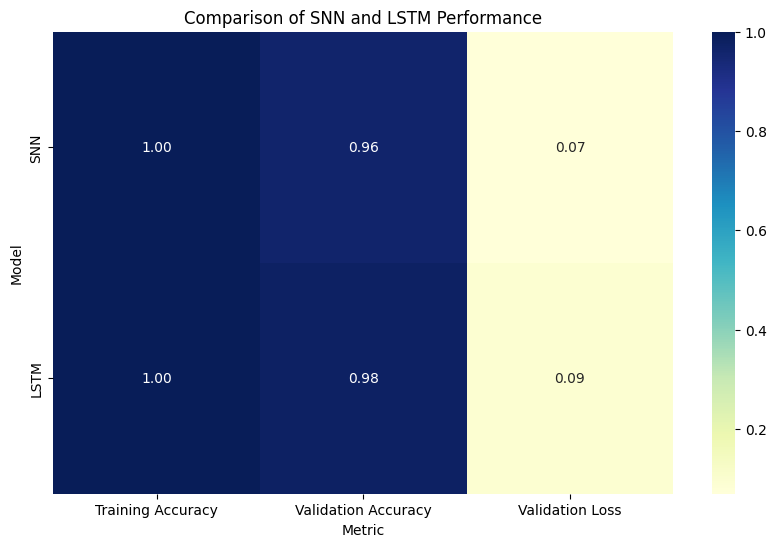

In [150]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of the model performance metrics
metrics = {
    'Model': ['SNN', 'LSTM'],
    'Training Accuracy': [snn_model_history.history['acc'][-1], lstm_model_history.history['acc'][-1]],
    'Validation Accuracy': [snn_model_history.history['val_acc'][-1], lstm_model_history.history['val_acc'][-1]],
    'Validation Loss': [snn_model_history.history['val_loss'][-1], lstm_model_history.history['val_loss'][-1]]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(metrics)

# Set the index to the model names
df = df.set_index('Model')

# Create a heatmap of the model performance metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Comparison of SNN and LSTM Performance')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()


In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score


# Print the shape of the dataset
print("Dataset shape:", df.shape)

# Separate features (X) and labels (y)
X = df['Text']  # Features
y = df['Label']  # Labels

# Initialize StratifiedKFold
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define hyperparameters grid
hyperparams = {
    'logistic_regression': {'C': [0.1, 1, 10]},
    'svm': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'random_forest': {'n_estimators': [50, 100, 150]}
}

# Models to be trained
models = {
    'logistic_regression': LogisticRegression(),
    'svm': SVC(),
    'random_forest': RandomForestClassifier()
}

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Iterate over models
for model_name, model in models.items():
    print(f"Training {model_name} model...")
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\tFold {fold + 1}/{k_folds}")

        x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Transform text data using TfidfVectorizer
        x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
        x_val_tfidf = tfidf_vectorizer.transform(x_val)

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, hyperparams[model_name], cv=skf)
        grid_search.fit(x_train_tfidf, y_train)
        best_model = grid_search.best_estimator_

        # Train the best model on the training set
        best_model.fit(x_train_tfidf, y_train)

        # Evaluate the best model on the validation set
        y_val_pred = best_model.predict(x_val_tfidf)
        recall = recall_score(y_val, y_val_pred, average='weighted')
        print(f"\tValidation Recall: {recall}")

        accuracy = accuracy_score(y_val, y_val_pred)
        print(f"\tValidation Accuracy: {accuracy}")



Dataset shape: (1791, 2)
Training logistic_regression model...
	Fold 1/5
	Validation Recall: 0.9832869080779945
	Validation Accuracy: 0.9832869080779945
	Fold 2/5
	Validation Recall: 0.9860335195530726
	Validation Accuracy: 0.9860335195530726
	Fold 3/5
	Validation Recall: 0.9888268156424581
	Validation Accuracy: 0.9888268156424581
	Fold 4/5
	Validation Recall: 0.994413407821229
	Validation Accuracy: 0.994413407821229
	Fold 5/5
	Validation Recall: 0.9888268156424581
	Validation Accuracy: 0.9888268156424581
Training svm model...
	Fold 1/5
	Validation Recall: 0.9805013927576601
	Validation Accuracy: 0.9805013927576601
	Fold 2/5
	Validation Recall: 0.9804469273743017
	Validation Accuracy: 0.9804469273743017
	Fold 3/5
	Validation Recall: 0.9916201117318436
	Validation Accuracy: 0.9916201117318436
	Fold 4/5
	Validation Recall: 1.0
	Validation Accuracy: 1.0
	Fold 5/5
	Validation Recall: 0.9888268156424581
	Validation Accuracy: 0.9888268156424581
Training random_forest model...
	Fold 1/5
	Vali

## **VISUALIZATION**

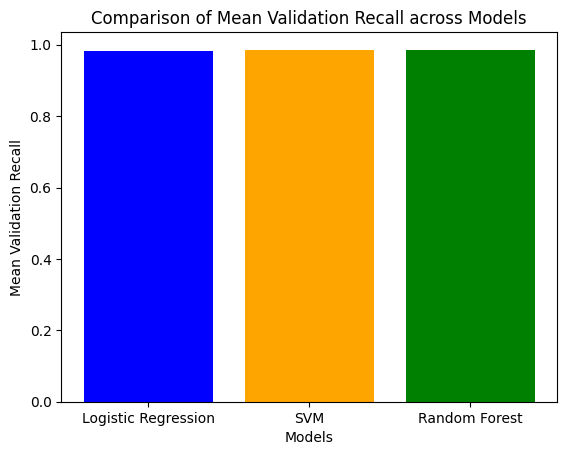

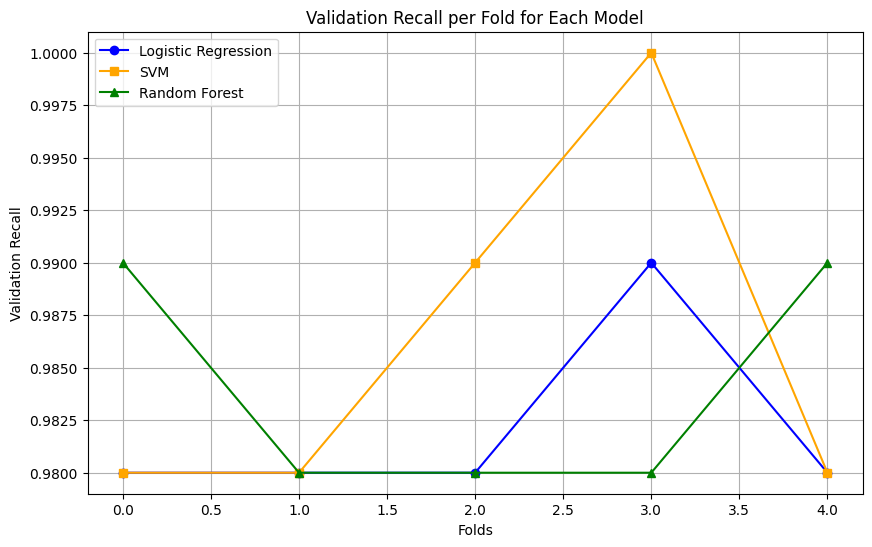

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (assuming you have your model recall values)
logistic_regression_recall = [0.98, 0.98, 0.98, 0.99, 0.98]
svm_recall = [0.98, 0.98, 0.99, 1.0, 0.98]
random_forest_recall = [0.99, 0.98, 0.98, 0.98, 0.99]
scores
# Labels for the models
labels = ['Logistic Regression', 'SVM', 'Random Forest']

# Calculate mean recall for each model
mean_recall = [np.mean(logistic_regression_recall),
                np.mean(svm_recall),
                np.mean(random_forest_recall)]

# Create a bar chart
plt.bar(labels, mean_recall, color=['blue', 'orange', 'green'])

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Mean Validation Recall')
plt.title('Comparison of Mean Validation Recall across Models')

# Display the plot
plt.show()


# Line plot for validation recall across folds for each model
plt.figure(figsize=(10, 6))

# Logistic Regression
plt.plot(logistic_regression_recall, label='Logistic Regression', marker='o', color='b')

# SVM
plt.plot(svm_recall, label='SVM', marker='s', color='orange')

# Random Forest
plt.plot(random_forest_recall, label='Random Forest', marker='^', color='g')

# Set labels and title
plt.xlabel('Folds')
plt.ylabel('Validation Recall')
plt.title('Validation Recall per Fold for Each Model')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**WHEN WE OBSERVE THE GRAPHS ON A CLOSER SCALE WE CAN SEE THE DIFFRENCES**

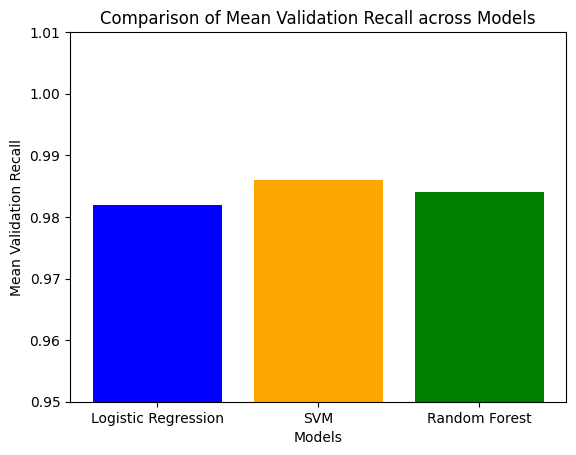

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (assuming you have your model recall values)
logistic_regression_recall = [0.98, 0.98, 0.98, 0.99, 0.98]
svm_recall = [0.98, 0.98, 0.99, 1.0, 0.98]
random_forest_recall = [0.99, 0.98, 0.98, 0.98, 0.99]


# Labels for the models
labels = ['Logistic Regression', 'SVM', 'Random Forest']

# Calculate mean recall for each model
mean_recall = [np.mean(logistic_regression_recall),
                np.mean(svm_recall),
                np.mean(random_forest_recall)]

# Increase the y-axis range to improve visualization of small differences
plt.ylim(0.95, 1.01)  # Adjust the range as needed

# Create a bar chart
plt.bar(labels, mean_recall, color=['blue', 'orange', 'green'])

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Mean Validation Recall')
plt.title('Comparison of Mean Validation Recall across Models')

# Display the plot
plt.show()


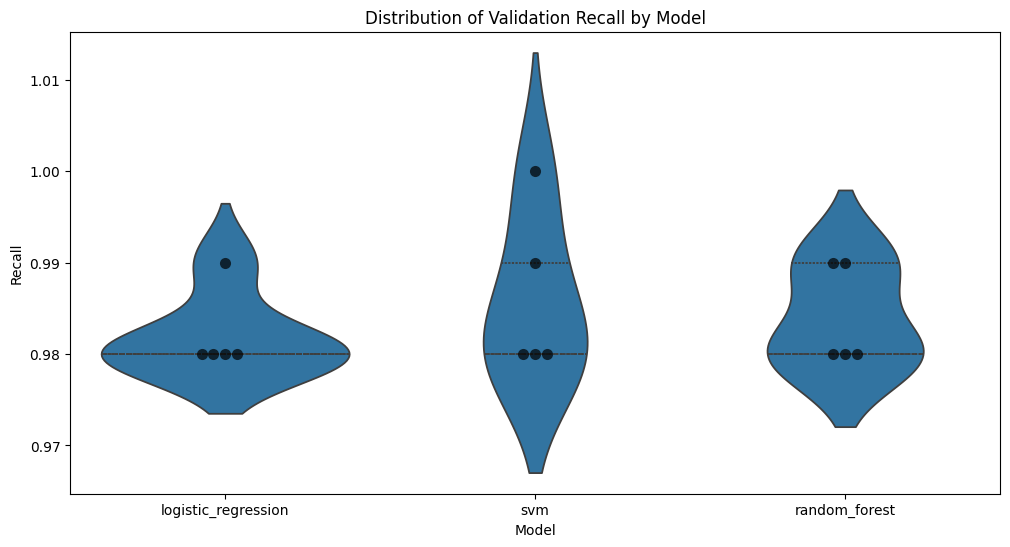

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a dictionary 'recall_scores' with model names as keys and lists of recall scores as values
# If not, you can create it similar to this:
recall_scores = {'logistic_regression': [0.98, 0.98, 0.98, 0.99, 0.98], 'svm': [0.98, 0.98, 0.99, 1.0, 0.98], 'random_forest': [0.99, 0.98, 0.98, 0.98, 0.99]}

# Convert recall_scores dictionary to a DataFrame for easier plotting
df_violin = pd.DataFrame([(model, fold + 1, recall)
                          for model, folds in recall_scores.items()
                          for fold, recall in enumerate(folds)],
                         columns=['Model', 'Fold', 'Recall'])

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Model', y='Recall', data=df_violin, inner='quartile', linewidth=1.3)
sns.swarmplot(x='Model', y='Recall', data=df_violin, color='k', size=8, alpha=0.7)
plt.title('Distribution of Validation Recall by Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()


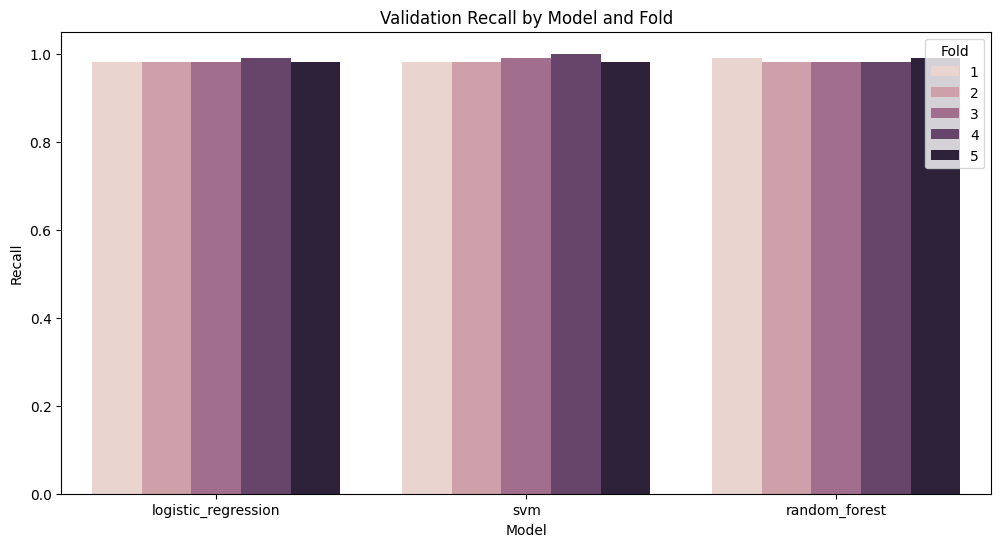

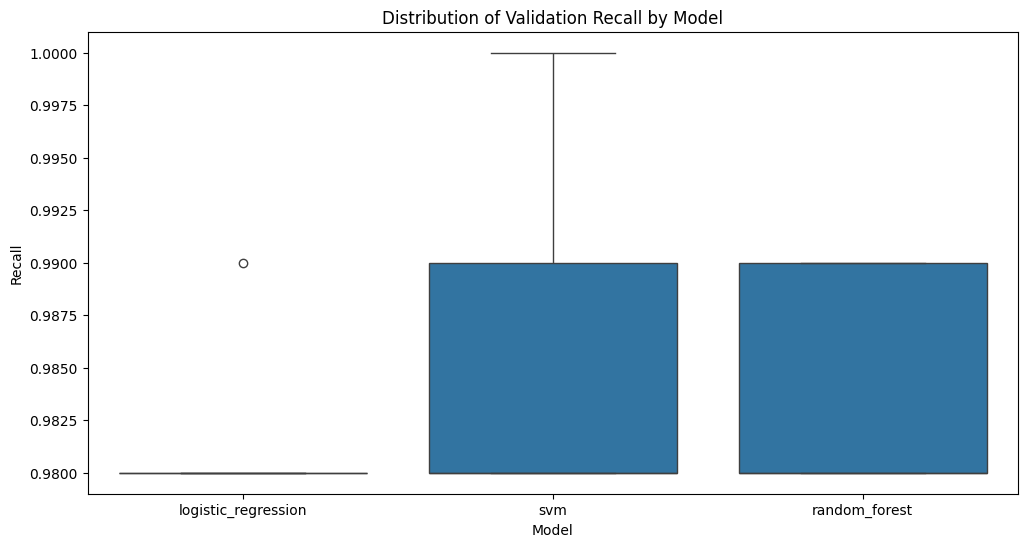

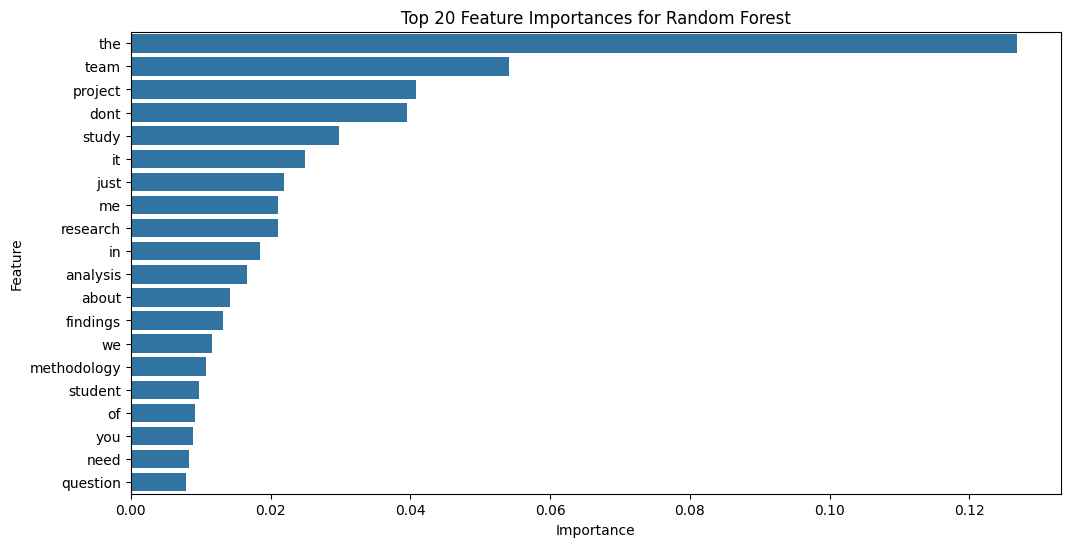

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Plot for Model Performance
results = {'Model': [], 'Fold': [], 'Recall': []}
for model_name, _ in models.items():
    for fold in range(k_folds):
        results['Model'].append(model_name)
        results['Fold'].append(fold + 1)
        results['Recall'].append(recall_scores[model_name][fold])

df_results = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Recall', hue='Fold', data=df_results)
plt.title('Validation Recall by Model and Fold')
plt.ylabel('Recall')
plt.show()

# 2. Box Plot for Model Performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Recall', data=df_results)
plt.title('Distribution of Validation Recall by Model')
plt.ylabel('Recall')
plt.show()



# 4. Feature Importance (for Random Forest)
if 'random_forest' in models:
    best_rf_model = models['random_forest']
    best_rf_model.fit(x_train_tfidf, y_train)

    feature_importances = best_rf_model.feature_importances_
    feature_names = tfidf_vectorizer.get_feature_names_out()

    df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    df_importances = df_importances.sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=df_importances)
    plt.title('Top 20 Feature Importances for Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


In [163]:


# Predict on validation set
y_test_pred = best_rf_model.predict(x_val_tfidf)

# Print the predicted labels
print("Predicted labels:", y_test_pred)


Predicted labels: ['student' 'ai' 'ai' 'student' 'ai' 'ai' 'ai' 'ai' 'student' 'student'
 'student' 'student' 'student' 'student' 'ai' 'ai' 'ai' 'ai' 'student'
 'ai' 'student' 'student' 'ai' 'ai' 'student' 'student' 'student' 'ai'
 'ai' 'ai' 'ai' 'ai' 'ai' 'student' 'ai' 'student' 'ai' 'ai' 'student'
 'ai' 'ai' 'student' 'student' 'ai' 'ai' 'ai' 'ai' 'student' 'ai' 'ai'
 'student' 'student' 'student' 'student' 'ai' 'ai' 'ai' 'ai' 'student'
 'student' 'student' 'ai' 'ai' 'ai' 'ai' 'ai' 'student' 'student'
 'student' 'student' 'student' 'student' 'student' 'ai' 'student'
 'student' 'ai' 'student' 'ai' 'ai' 'student' 'student' 'student'
 'student' 'student' 'ai' 'student' 'ai' 'student' 'student' 'student'
 'ai' 'ai' 'student' 'ai' 'ai' 'student' 'ai' 'ai' 'ai' 'ai' 'student'
 'ai' 'ai' 'student' 'student' 'student' 'ai' 'ai' 'student' 'ai'
 'student' 'student' 'student' 'ai' 'student' 'ai' 'ai' 'ai' 'ai' 'ai'
 'ai' 'ai' 'student' 'ai' 'student' 'student' 'student' 'ai' 'student'
 'ai' 'a

# Transformers


In [28]:
# load the dataset
import pandas as pd

# load the dataset with specified encoding
df1= pd.read_excel("/content/dataset updated1.xlsx")
df1.head(5)

,Text,Label
0,y r u always l8 to the meetings?,student
1,The project team embraced a user-centric desig...,ai
2,"i dont like dealing with risks, it's too stres...",student
3,"i dont worry about reliability, it's good enough",student
4,"i dont care about human-centered design, just ...",student


In [29]:
df1.groupby('Label').describe()

Text                                                               
        count unique                                                top freq
Label                                                                       
ai        633    457  The research question is clearly defined and r...    6
student  1158    870  i dont talk about limitations, it makes me loo...   31

In [30]:
df1['Label'].value_counts()
633/1158

0.5466321243523317

In [31]:
#54% student 46% ai
df1_ai = df1[df1['Label']=='ai']
df1_ai.shape
df1_student = df1[df1['Label']=='student']
df1_student.shape

(1158, 2)

In [32]:
df1_student_downsampled = df1_student.sample(df1_ai.shape[0])
df1_student_downsampled.shape

(633, 2)

In [33]:
df1_balanced = pd.concat([df1_student_downsampled, df1_ai])
df1_balanced.shape

(1266, 2)

In [34]:
df1_balanced['Label'].value_counts()

Label
student    633
ai         633
Name: count, dtype: int64

In [35]:
df1_balanced['ai']=df1_balanced['Label'].apply(lambda x: 1 if x=='ai' else 0)
df1_balanced.sample(5)

,Text,Label,ai
821,The research findings are generalizable to a b...,ai,1
337,The project team demonstrated effective commun...,ai,1
541,The project team utilized best practices in pr...,ai,1
660,The project team demonstrated effective risk m...,ai,1
1577,"Yes, looking into AI solutions to streamline o...",student,0


In [36]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1_balanced['Text'],df1_balanced['ai'], stratify=df1_balanced['ai'])
X_train.head(4)

448    The project team maintained a positive team dy...
958    The analysis considered the impact of external...
877    The study of neuroplasticity in neuroscience r...
25                                lol ur jokes r so lame
Name: Text, dtype: object

In [173]:
# !pip install tensorflow_text


In [174]:
# !pip uninstall tensorflow


Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.13.0


In [175]:
# !pip install tensorflow==2.13.0


  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)


In [1]:
# !pip install -U "tensorflow-text==2.13.*
# !pip install "tf-models-official==2.13.*

In [37]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [38]:
import tensorflow_text as text

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [40]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.51327264, -0.8884571 , ..., -0.7474883 ,
        -0.7531474 ,  0.91964495],
       [-0.87208354, -0.50543964, -0.9444669 , ..., -0.85847515,
        -0.7174534 ,  0.88082975]], dtype=float32)>

In [41]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [43]:
cosine_similarity([e[0]],[e[3]])

array([[0.8470384]], dtype=float32)

In [44]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [46]:
len(X_train)
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


In [47]:
type(METRICS)

list

In [67]:
# Train your BERT model and capture the history
bert_model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Now you have stored the training history in bert_model_history


Epoch 1/10
30/30 [==============================] - 418s 14s/step - loss: 0.4809 - accuracy: 0.7935 - precision: 0.7912 - recall: 0.7979 - val_loss: 0.4400 - val_accuracy: 0.8801 - val_precision: 0.8448 - val_recall: 0.9304
Epoch 2/10
30/30 [==============================] - 362s 12s/step - loss: 0.4308 - accuracy: 0.8398 - precision: 0.8185 - recall: 0.8737 - val_loss: 0.3984 - val_accuracy: 0.9022 - val_precision: 0.8508 - val_recall: 0.9747
Epoch 3/10
30/30 [==============================] - 412s 14s/step - loss: 0.3876 - accuracy: 0.8746 - precision: 0.8397 - recall: 0.9263 - val_loss: 0.3558 - val_accuracy: 0.9117 - val_precision: 0.8779 - val_recall: 0.9557
Epoch 4/10
30/30 [==============================] - 357s 12s/step - loss: 0.3511 - accuracy: 0.8915 - precision: 0.8720 - recall: 0.9179 - val_loss: 0.3252 - val_accuracy: 0.9306 - val_precision: 0.9096 - val_recall: 0.9557
Epoch 5/10
30/30 [==============================] - 412s 14s/step - loss: 0.3260 - accuracy: 0.8999 - pr

In [68]:
bert_model_history.history

{'loss': [0.48086148500442505,
  0.43081149458885193,
  0.38756394386291504,
  0.3510909378528595,
  0.3259686529636383,
  0.30120962858200073,
  0.2831823229789734,
  0.2679503560066223,
  0.24653102457523346,
  0.23461100459098816],
 'accuracy': [0.7934668064117432,
  0.8398314118385315,
  0.8746048212051392,
  0.8914647102355957,
  0.899894654750824,
  0.9093782901763916,
  0.9199156761169434,
  0.9325605630874634,
  0.9420442581176758,
  0.9430980086326599],
 'precision': [0.7912317514419556,
  0.8185404539108276,
  0.8396946787834167,
  0.871999979019165,
  0.8754940629005432,
  0.8977504968643188,
  0.9046652913093567,
  0.9185336232185364,
  0.9251012206077576,
  0.9358177781105042],
 'recall': [0.7978947162628174,
  0.8736842274665833,
  0.9263157844543457,
  0.917894721031189,
  0.9326315522193909,
  0.9242105484008789,
  0.9389473795890808,
  0.9494736790657043,
  0.9621052742004395,
  0.9515789747238159],
 'val_loss': [0.43999311327934265,
  0.39836761355400085,
  0.35581064

In [69]:
evaluation = model.evaluate(X_test, y_test)

10/10 [==============================] - 90s 9s/step - loss: 0.2115 - accuracy: 0.9653 - precision: 0.9623 - recall: 0.9684


In [70]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 90s 9s/step


In [71]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[153,   6],
       [  5, 153]])

Text(50.722222222222214, 0.5, 'Truth')

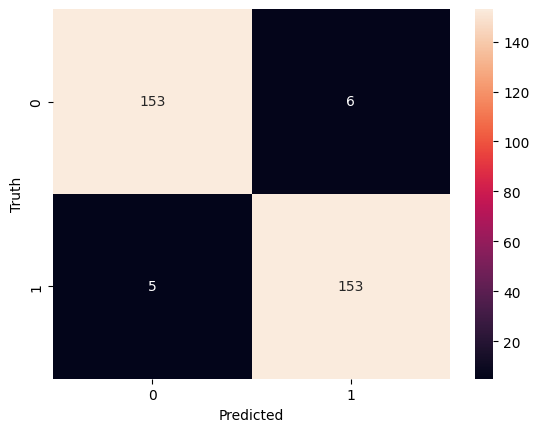

In [73]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
bert_model_history.history

{'loss': [0.48086148500442505,
  0.43081149458885193,
  0.38756394386291504,
  0.3510909378528595,
  0.3259686529636383,
  0.30120962858200073,
  0.2831823229789734,
  0.2679503560066223,
  0.24653102457523346,
  0.23461100459098816],
 'accuracy': [0.7934668064117432,
  0.8398314118385315,
  0.8746048212051392,
  0.8914647102355957,
  0.899894654750824,
  0.9093782901763916,
  0.9199156761169434,
  0.9325605630874634,
  0.9420442581176758,
  0.9430980086326599],
 'precision': [0.7912317514419556,
  0.8185404539108276,
  0.8396946787834167,
  0.871999979019165,
  0.8754940629005432,
  0.8977504968643188,
  0.9046652913093567,
  0.9185336232185364,
  0.9251012206077576,
  0.9358177781105042],
 'recall': [0.7978947162628174,
  0.8736842274665833,
  0.9263157844543457,
  0.917894721031189,
  0.9326315522193909,
  0.9242105484008789,
  0.9389473795890808,
  0.9494736790657043,
  0.9621052742004395,
  0.9515789747238159],
 'val_loss': [0.43999311327934265,
  0.39836761355400085,
  0.35581064

In [75]:
# Assuming you've trained your BERT model and stored its training history in bert_model_history

# Define the metrics dictionary
metrics = {
    'Model': ['BERT'],
    'Training Accuracy': [bert_model_history.history['accuracy'][-1]],
    'Validation Accuracy': [bert_model_history.history['val_accuracy'][-1]],
    'Training Loss': [bert_model_history.history['loss'][-1]],
    'Validation Loss': [bert_model_history.history['val_loss'][-1]]
}


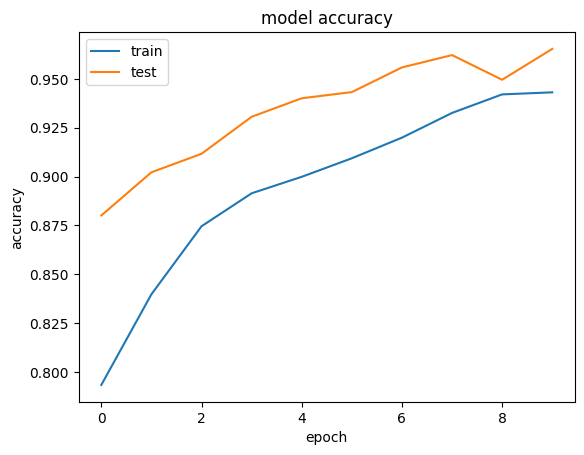

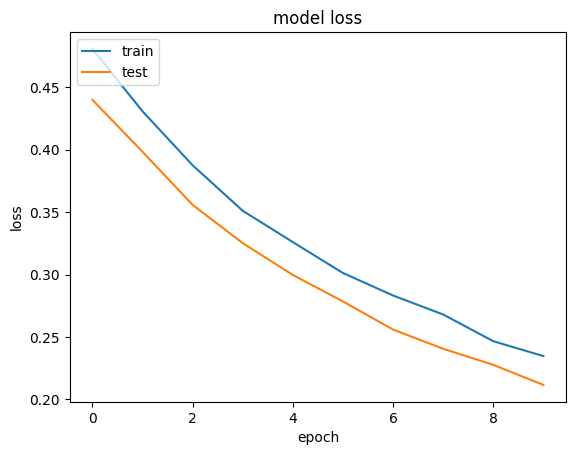

In [76]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(bert_model_history.history['accuracy'])
plt.plot(bert_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bert_model_history.history['loss'])
plt.plot(bert_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [77]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       159
           1       0.96      0.97      0.97       158

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317



In [78]:
reviews = [
    ' y r u always l8 to the meetings? ',
    'i dont worry about reliability, its good enough'

]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[0.10130626],
       [0.06195659]], dtype=float32)

history = bert_model_history.history

loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Plot the loss and accuracy curves
epochs = range(1, len(loss) + 1)

# Loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.figure()
plt.plot(epochs, accuracy, 'ro', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()